# Project 01: Churn Prediction in Telecom Industry using Logistic Regression
### Submitted By: Yashuv Baskota

### Language- Python
### Datasets :- https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

## 1. Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 2. Exploratory Data Analysis

In [2]:
# path to the dataset folder
folder_path = '.\data'

# list all the filenames in the folder
filenames = os.listdir(folder_path)

# print the filenames
for filenames in os.listdir(folder_path):
    print(os.path.join(folder_path,filenames))

.\data\.ipynb_checkpoints
.\data\churn-bigml-20.csv
.\data\churn-bigml-80.csv
.\data\Groceries_dataset.csv


In [3]:
telcom1 = pd.read_csv("data/churn-bigml-80.csv")
telcom2 = pd.read_csv("data/churn-bigml-20.csv")

# load all dataset into a DataFrame
telcom = pd.concat([telcom1, telcom2], ignore_index=True)

In [4]:
telcom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telcom.shape

(3333, 20)

In [6]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Comment: Hence, we found that the dataset contains *3333* rows (customers) and *20* columns (features).<br>
The `"Churn"` column is the target to predict.

In [7]:
# accessing Churn feature
telcom['Churn'].head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Churn, dtype: bool

In [8]:
# no. of churners and non-churners in the dataset 
telcom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

### Summary statistics for both classes

In [9]:
# Group telcom by 'Churn' and compute the mean
telcom.groupby(['Churn']).mean()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


Churners seem to make more customer service calls than non-churners.

In [10]:
telcom.groupby(['Churn']).std()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,39.88235,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
True,39.46782,42.792270,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.793190,2.551575,0.754152,1.853275


### Churn by State

In [11]:
telcom.groupby('State')['Churn'].value_counts()

State  Churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: Churn, Length: 102, dtype: int64

Comment: This is useful information for a company!

### Exploring data using visualizations

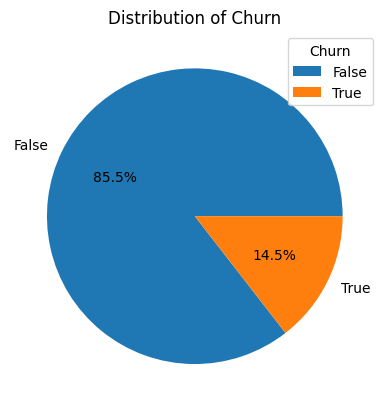

In [12]:
# Count the number of data points in each category
counts = telcom['Churn'].value_counts()

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Customize the appearance of the pie chart
plt.title('Distribution of Churn')
plt.legend(title='Churn')
plt.show()

#### Exploring feature distributions

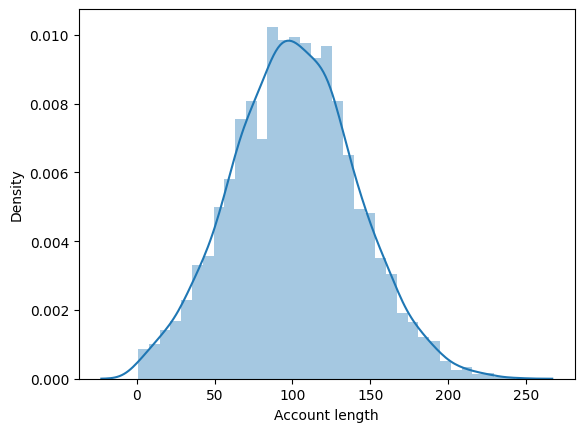

In [13]:
# visualize the distribution of 'Account length'
sns.distplot(telcom['Account length'])

# display the plot
plt.show()

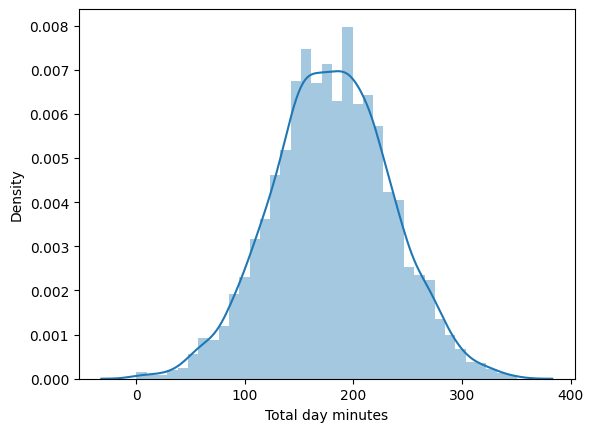

In [14]:
sns.distplot(telcom['Total day minutes'])
plt.show()

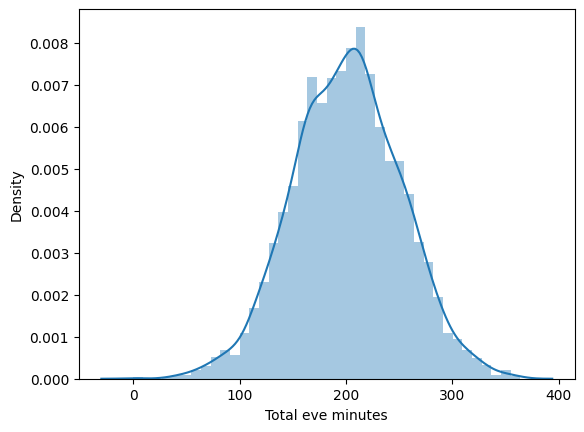

In [15]:
sns.distplot(telcom['Total eve minutes'])
plt.show()

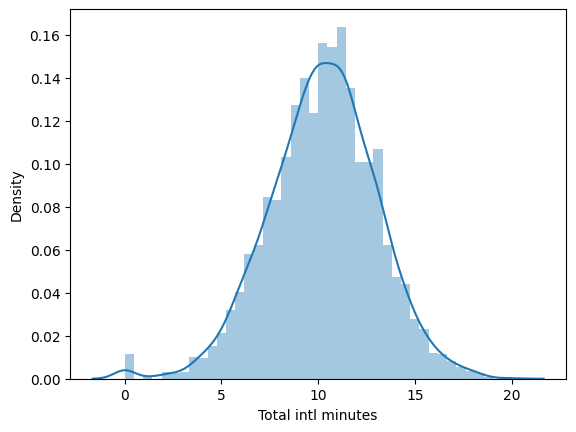

In [16]:
sns.distplot(telcom['Total intl minutes'])
plt.show()

Comment: All of these features above appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

## 3. Data preprocessing


### Cleaning the data

In [17]:
# Check for missing values
has_missing = telcom.isnull().any()
has_missing

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

In [18]:
# check for duplicate rows 
duplicate_rows = telcom[telcom.duplicated()]
duplicate_rows

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


### Identifying features to convert

In [19]:
telcom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
telcom.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [21]:
# Find the columns that contain boolean values
bool_columns = telcom.select_dtypes(include=['bool']).columns
print(bool_columns)

# Find the columns of object type
object_columns = telcom.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Churn'], dtype='object')
Index(['State', 'International plan', 'Voice mail plan'], dtype='object')


### Encoding binary features

In [22]:
# Convert the boolean values to integers
telcom[bool_columns] = telcom[bool_columns].astype(int)

In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'International plan' and 'Voice mail plan'
telcom[['International plan','Voice mail plan']] = telcom[['International plan','Voice mail plan']].apply(lambda x: x.map({'No': 0, 'Yes': 1}))

In [24]:
# see the results
telcom[['International plan','Voice mail plan','Churn']].head()

,International plan,Voice mail plan,Churn
0,0,1,0
1,0,1,0
2,0,0,0
3,1,0,0
4,1,0,0


### Feature selection and engineering

Dropping unnecessary and correlated features

In [25]:
# drop 'State' feature
telcom = telcom.drop(telcom[['State']], axis=1)

# Calculate the correlation matrix
corr_matrix = telcom.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

# Drop the correlated features from the dataset
telcom = telcom.drop(telcom[to_drop], axis=1)

telcom.head()

['Number vmail messages', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']


,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


### Feature scaling
To ensure that all variables are on the same scale and have comparable influence on the model.<br>
eg: Let's see the different scales of the `'Total intl calls'` and `'Total night minutes'` features:

In [26]:
telcom['Total intl calls'].describe()

count    3333.000000
mean        4.479448
std         2.461214
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: Total intl calls, dtype: float64

In [27]:
telcom['Total night minutes'].describe()

count    3333.000000
mean      200.872037
std        50.573847
min        23.200000
25%       167.000000
50%       201.200000
75%       235.300000
max       395.000000
Name: Total night minutes, dtype: float64

In [28]:
# from sklearn.preprocessing import StandardScaler

# Scale telcom using StandardScaler
features_to_scale = [column for column in telcom.columns if column not in ['International plan','Voice mail plan','Churn']]
# print(features_to_scale)
telcom_scaled = StandardScaler().fit_transform(telcom[features_to_scale])

# Add column names back for readability
telcom_scaled_df = pd.DataFrame(telcom_scaled, columns=features_to_scale)

# summary statistics
print(telcom_scaled_df.describe())

# final preprocessed dataframe
telcom = pd.concat([telcom_scaled_df, telcom[['International plan', 'Voice mail plan','Churn']]], axis=1)

       Account length     Area code  Total day minutes  Total day calls  \
count    3.333000e+03  3.333000e+03       3.333000e+03     3.333000e+03   
mean     1.407015e-16  4.199728e-16      -3.165784e-16    -1.955964e-16   
std      1.000150e+00  1.000150e+00       1.000150e+00     1.000150e+00   
min     -2.513172e+00 -6.888343e-01      -3.301096e+00    -5.005247e+00   
25%     -6.797448e-01 -6.888343e-01      -6.624241e-01    -6.695701e-01   
50%     -1.627644e-03 -5.236033e-01      -6.887677e-03     2.812491e-02   
75%      6.513740e-01  1.718817e+00       6.725198e-01     6.759846e-01   
max      3.564766e+00  1.718817e+00       3.140422e+00     3.217588e+00   

       Total eve minutes  Total eve calls  Total night minutes  \
count       3.333000e+03     3.333000e+03         3.333000e+03   
mean       -7.248261e-17     3.346991e-16         8.287533e-17   
std         1.000150e+00     1.000150e+00         1.000150e+00   
min        -3.963622e+00    -5.025911e+00        -3.513648e+

## 4. Model Building and Performance Evaluation

### Model Selection:

* **Logistic Regression**

We choose `Logistic Regression` as our estimator for this project.

In [29]:
# from sklearn.linear_model import LogisticRegression

# instantiate our classifier
clf = LogisticRegression()

In [30]:
telcom.head()

,Account length,Area code,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan,Voice mail plan,Churn
0,0.676489,-0.523603,1.566767,0.476643,-0.070610,-0.055940,0.866743,-0.465494,-0.085008,-0.601195,-0.427932,0,1,0
1,0.149065,-0.523603,-0.333738,1.124503,-0.108080,0.144867,1.058571,0.147825,1.240482,-0.601195,-0.427932,0,1,0
2,0.902529,-0.523603,1.168304,0.675985,-1.573383,0.496279,-0.756869,0.198935,0.703121,0.211534,-1.188218,0,0,0
3,-0.428590,-0.688834,2.196596,-1.466936,-2.742865,-0.608159,-0.078551,-0.567714,-1.303026,1.024263,0.332354,1,0,0
4,-0.654629,-0.523603,-0.240090,0.626149,-1.038932,1.098699,-0.276311,1.067803,-0.049184,-0.601195,1.092641,1,0,0


### Creating training and test sets

In [31]:
# from sklearn.model_selection import train_test_split

# create feature variable (which holds all of the features of telco by dropping the target variable 'Churn' from telco)
X = telcom.drop(telcom[['Churn']], axis=1)

# create target variable
y = telcom['Churn']

# Create training and testing sets (here 80% of the data is used for training.)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Fit to the training data
clf.fit(X_train, y_train)

# The predicted labels of classifier
y_pred = clf.predict(X_test)

### Check each sets length

In [33]:
print(X_train.shape)
print(X_test.shape)

(2666, 13)
(667, 13)


### Model Metrics:

In [34]:
# from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

#### Confusion matrix

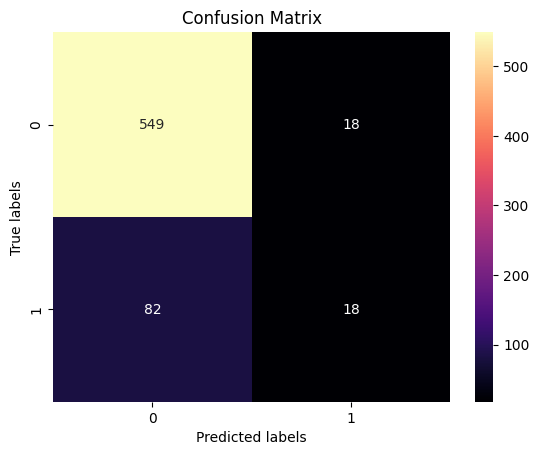

In [35]:
# Calculate the confusion matrix
matrix = confusion_matrix(y_test, y_pred)
# print(matrix)

# Plot the confusion matrix using seaborn
sns.heatmap(matrix, annot=True, fmt='d', cmap='magma')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       567
           1       0.50      0.18      0.26       100

    accuracy                           0.85       667
   macro avg       0.69      0.57      0.59       667
weighted avg       0.81      0.85      0.82       667



#### Accuracy, Precision, Recall and F1 Score

Accuracy is a measure of how well a classifier performs in terms of correctly predicting the class of an input sample.

Recall is a measure of the proportion of positive examples that were correctly classified by the model. It is calculated using the following formula:
$$Recall = \frac{True Positives}{True Positives + False Negatives}$$

Precision is a measure of the proportion of predicted positive examples that are actually positive. It is calculated using the following formula:

$$Precision = \frac{True Positives}{True Positives + False Positives}$$

The F1 score is a measure of the accuracy of a classifier, defined as the harmonic mean of precision and recall.

$$F_1 = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$

In [37]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_pred)))
print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))

Accuracy: 0.85
Precision: 0.50
Recall: 0.18
F1 score: 0.26


#### ROC Curve

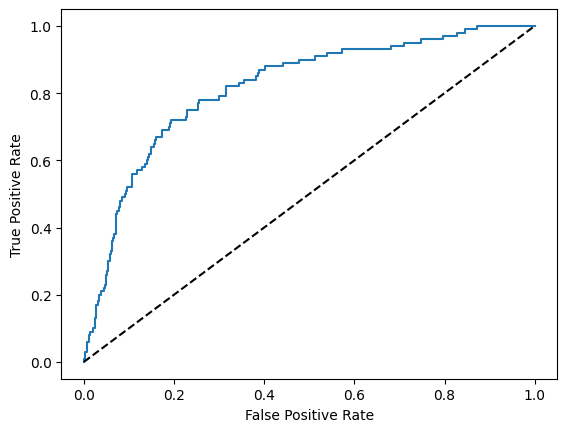

In [38]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Use roc_curve() to calculate the false positive rate, true positive rate, and thresholds.
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

#### Area under the ROC curve

In [39]:
# the area under the ROC curve
roc_auc_score(y_test, y_pred_prob)

0.8163492063492064

## 5. Making Predictions (whether a new customer will churn)

In [40]:
def make_prediction(customer):
    prediction = clf.predict(customer)
    if prediction[0] == 1:
        print("[1] The customer will Churn.")
    else:
        print("[0] The customer will not Churn")

In [41]:
# scaled input values
new_customer1 = [[0.6262585675178604,
                  1.7188173197427594,
                 -1.0535424482925813,
                 -0.6197347815607696,
                 -1.1276788128173842,
                 0.5464802852218092,
                 -0.8676148392853111,
                 0.3011544282701762,
                 0.4523525497250106,
                 -0.6011950896927287,
                 -0.4279320210630441,
                 0.0,
                 0.0]]

new_customer2 = [[0.5257967737031338,
                  -0.5236032802413713,
                  0.9387740897371452,
                  1.5730210856813158,
                  0.8326323403400316,
                  -0.0559403500169171,
                  -0.3653036104833324,
                  -2.20323162813801,
                  0.27323229022856793,
                  -1.0075595662585095,
                  -1.1882184955849664,
                  1.0,
                  0.0]]

# make prediction on new customers
make_prediction(new_customer1)
make_prediction(new_customer2)

[0] The customer will not Churn
[1] The customer will Churn.


<br>

## Thank You!